# Importación de librerias necesarias

In [1]:
#Inporatamos la libreria pandas
import pandas as pd 
#Inporatamos la libreria seaborn
import seaborn as sns
#Inporatamos la libreria numpy
import numpy as np
#Importamos LabelEncoder desde la libreria sklearn
from sklearn.preprocessing import LabelEncoder
#Importamos train_test_split desde la libreria sklearn
from sklearn.model_selection import train_test_split
#Importamos MinMaxScaler desde la libreria sklearn
from sklearn.preprocessing import MinMaxScaler
#Importamos la libreria matplotlib
import matplotlib.pyplot as plt
#Importamos GaussianNB desde la libreria sklearn
from sklearn.naive_bayes import GaussianNB
#Importamos Metric desde la libreria sklearn
from sklearn import metrics
#Importamos la libreria collections
import collections
#Importamos confusion_matrix desde la libreria sklearn
from sklearn.metrics import confusion_matrix
# Importamos acurracy_score desde la libreria sklearn
from sklearn.metrics import accuracy_score
#Importamos recall_score desde la libreria sklearn
from sklearn.metrics import recall_score
#Importamos precision_score desde la libreria sklearn
from sklearn.metrics import precision_score
#Importamos f1_score desde la libreria sklearn
from sklearn.metrics import f1_score
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
#Importamos hiden markov model desde la libreria hmmlearn
from hmmlearn import hmm
#Importamos la libreria que permite realizar el modelo Fuzzy Logic
from fcmeans import FCM

In [2]:
#Carga del dataset
df = pd.read_csv("mantenimiento.csv")

In [3]:
#Mostrar el dataset
df.head(1000)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
995,996,L48175,L,296.3,307.3,1566,35.8,175,0,No Failure
996,997,M15856,M,296.3,307.2,1286,51.1,177,0,No Failure
997,998,M15857,M,296.3,307.2,1446,45.9,180,0,No Failure
998,999,M15858,M,296.4,307.2,2071,19.4,183,0,No Failure


In [4]:
#Aplicación de la funcion describe para ver información estadística del dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
#Aplicación de la funció n count para ver la cantidad de registros del dataset
df.count()

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Target                     10000
Failure Type               10000
dtype: int64

In [6]:
#Mostrar la información del nuevo dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Limpieza del dataset

In [7]:
#Aplicación de la función nunique para identificar las variable categoricas
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [8]:
#Verificamos la existencia de datos nulos
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
#Verificamos la existencia  de datos vacios (longitud = 0)
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# Tranformación de datos categóricos a la nueva data

In [10]:
#Identificamos los valores unicos para cada categoria
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [11]:

#Aplicación de label encoder para eliminar las variables categoricas 
'''Se convierte de tipo objeto a categórico'''
df1 = df.astype('category')
'''Se visualiza el cambio en el tipo de datos de las características'''
df1.dtypes

UDI                        category
Product ID                 category
Type                       category
Air temperature [K]        category
Process temperature [K]    category
Rotational speed [rpm]     category
Torque [Nm]                category
Tool wear [min]            category
Target                     category
Failure Type               category
dtype: object

In [12]:
'''Se importa la librería de LabelEndocer para transformar de categórico a numérico'''
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df1.columns:
    df1[column] = labelencoder.fit_transform(df1[column])

df1.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0,7003,2,28,29,325,313,0,0,1
1,1,1003,1,29,30,182,348,2,0,1
2,2,1004,1,28,28,272,379,4,0,1
3,3,1005,1,29,29,207,280,6,0,1
4,4,1006,1,29,30,182,285,8,0,1
...,...,...,...,...,...,...,...,...,...,...
95,95,7031,2,37,33,125,407,43,0,1
96,96,7032,2,37,33,349,238,46,0,1
97,97,7033,2,36,32,524,184,49,0,1
98,98,1058,1,36,31,303,212,52,0,1


In [13]:
#Mostrar la información del dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   UDI                      10000 non-null  int64
 1   Product ID               10000 non-null  int32
 2   Type                     10000 non-null  int32
 3   Air temperature [K]      10000 non-null  int64
 4   Process temperature [K]  10000 non-null  int64
 5   Rotational speed [rpm]   10000 non-null  int64
 6   Torque [Nm]              10000 non-null  int64
 7   Tool wear [min]          10000 non-null  int64
 8   Target                   10000 non-null  int64
 9   Failure Type             10000 non-null  int32
dtypes: int32(3), int64(7)
memory usage: 664.2 KB


# PCA

In [14]:
#Asignación de las variables de entrada y objetivo para el entrenamiento y prueba
y = df1["Target"]
X = df1.drop("Target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

C:\Users\enrik\AppData\Local\Temp\ipykernel_8800\1766404873.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#f68c1f', alpha=0.1)


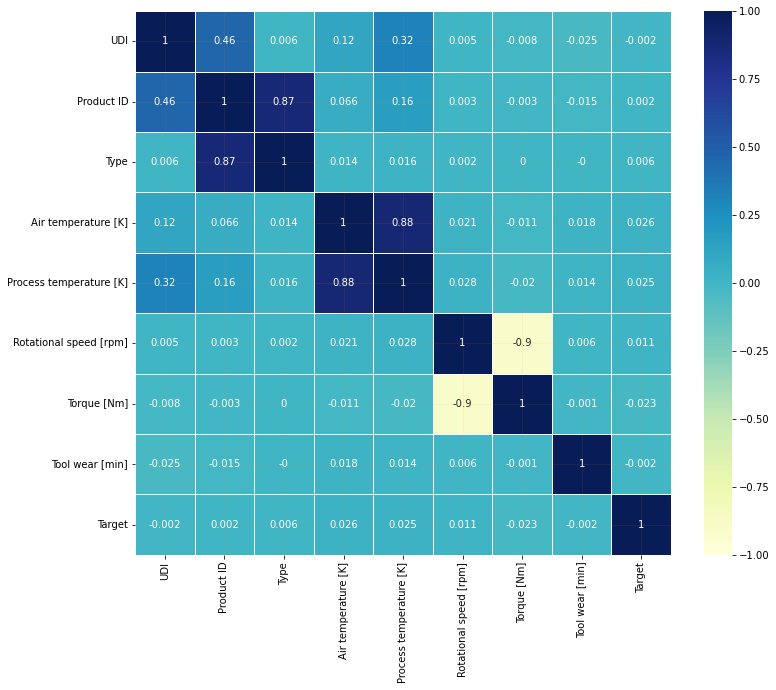

In [15]:
#Aplicación de la grafica de correlación
df_train = pd.DataFrame(X_train_std, columns= df1.iloc[:, 0:9].columns)
df_train["Target"] = y_train

corr = df_train.corr()
plt.figure(figsize = (12,10))

sns.heatmap(round(corr, 3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

std_X_test = std.transform(X_test)

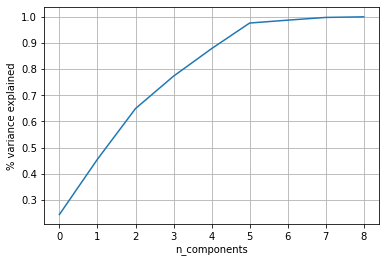

In [17]:
#Importamos la libreria para aplicar PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = X_train_std.shape[1])
pca_data = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

C:\Users\enrik\AppData\Local\Temp\ipykernel_8800\1956525910.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, color='#f68c1f', alpha=0.1)


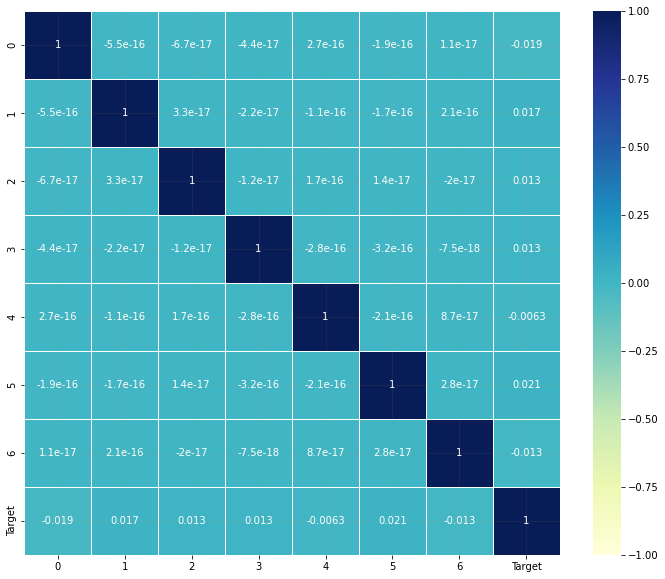

In [18]:
#Selección de la cantidad de componentes para el entrenamiento y test
pca = PCA(n_components=7)
pca_train_data = pca.fit_transform(X_train_std)
pca_test_data = pca.transform(X_test_std)

df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["Target"] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (12,10))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

In [21]:
total_val = pca.explained_variance_ratio_.sum()
print('La varianza explicada total por estos componentes es %.2f' %total_val)

La varianza explicada total por estos componentes es 0.99


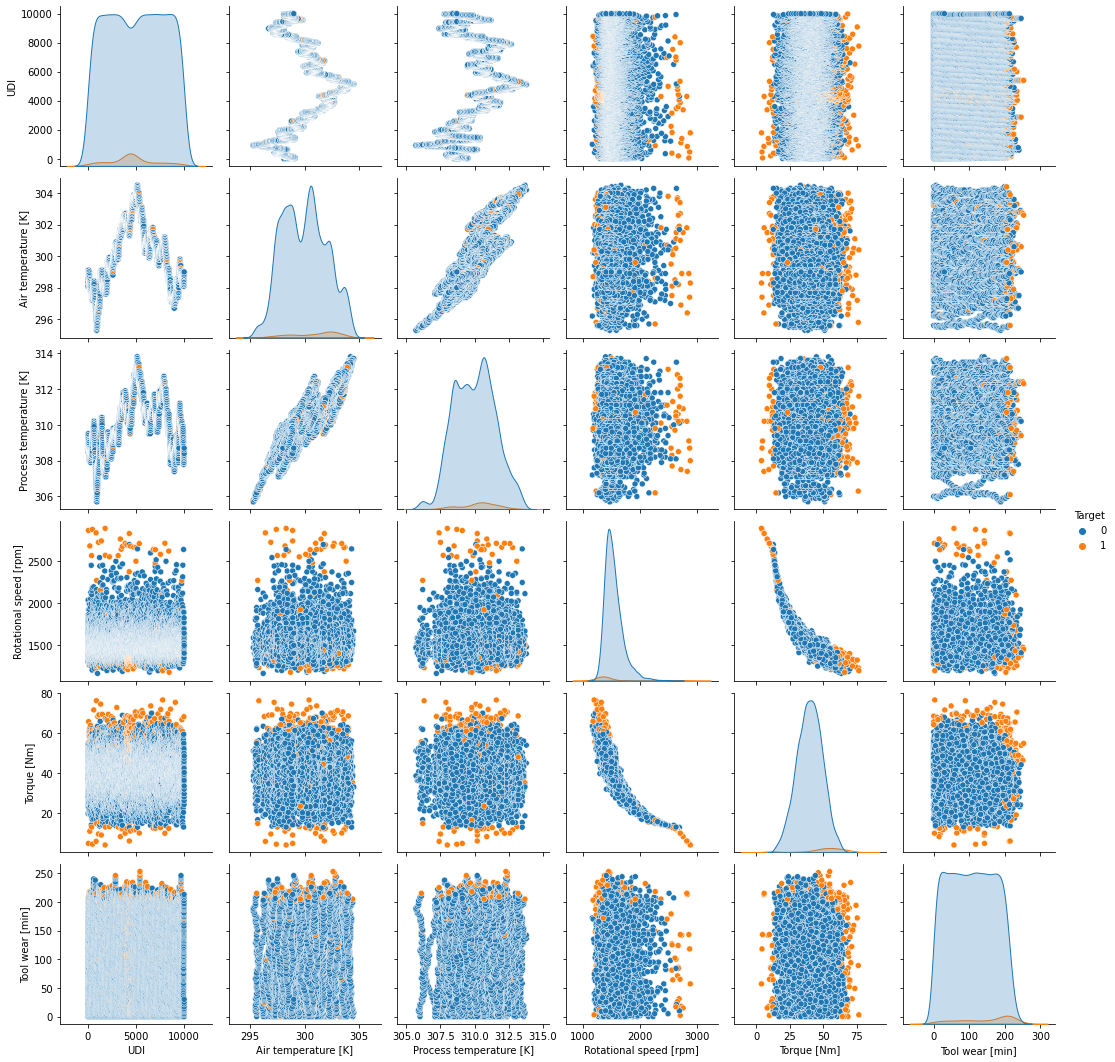

In [22]:
#Corrrelacion 
sns.pairplot(df,hue='Target')

In [27]:
corr_df = df.corr()
# Imprimimos un mensaje informativo
print("La correlación del DataFrame es:")
# Imprimimos la correlación
print(corr_df, "\n")

La correlación del DataFrame es:
                              UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Target                  -0.022892             0.082556   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Torque [Nm]                            -0.014061               -0.875027   
Tool wear [min]                         0.0134

# Preprocesamiento de los datos

In [28]:
# Asignamos las variables dependientes
X = df1[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]
y = df1['Target']

# Estandarización de la data

In [29]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Target', axis=1),
                                                    df1['Target'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((7000, 9), (3000, 9))

In [30]:

# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [31]:
# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([9.998e+03, 9.998e+03, 2.000e+00, 9.200e+01, 8.100e+01, 9.400e+02,
       5.760e+02, 2.450e+02, 5.000e+00])

In [32]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00106496,  0.        ,  0.        ,  0.        ])

In [33]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([9.998e+03, 9.998e+03, 2.000e+00, 9.200e+01, 8.100e+01, 9.390e+02,
       5.760e+02, 2.450e+02, 5.000e+00])

In [34]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
# let's have a look at the original training dataset: min and max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train.describe(), 1)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,4997.5,4998.9,1.2,47.0,43.1,309.1,284.6,105.8,1.0
std,2892.5,2895.8,0.6,20.1,14.9,161.6,99.2,63.9,0.4
min,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,2483.8,2484.5,1.0,30.0,31.0,197.8,216.0,50.0,1.0
50%,5015.5,4995.5,1.0,48.0,44.0,278.0,286.0,105.0,1.0
75%,7513.5,7502.2,2.0,62.0,54.0,387.0,352.0,161.0,1.0
max,9998.0,9998.0,2.0,92.0,81.0,940.0,576.0,245.0,5.0


In [36]:
# let's have a look at the scaled training dataset: min and max values
# I use np.round to reduce the number of decimals to 1.

np.round(X_train_scaled.describe(), 1)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
count,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0,7000.0
mean,0.5,0.5,0.6,0.5,0.5,0.3,0.5,0.4,0.2
std,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.2,0.5,0.3,0.4,0.2,0.4,0.2,0.2
50%,0.5,0.5,0.5,0.5,0.5,0.3,0.5,0.4,0.2
75%,0.8,0.8,1.0,0.7,0.7,0.4,0.6,0.7,0.2
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


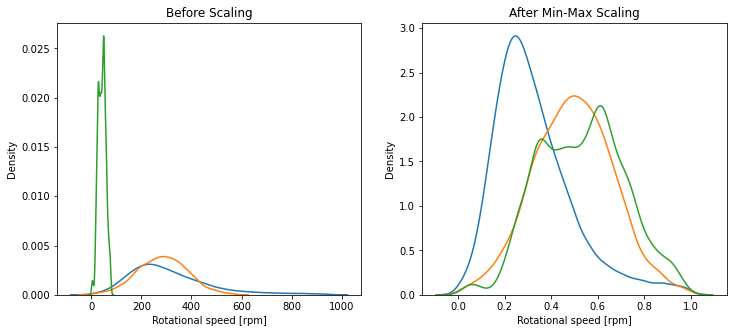

In [37]:
# Escala

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Antes de escalar
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Rotational speed [rpm]'], ax=ax1)
sns.kdeplot(X_train['Torque [Nm]'], ax=ax1)
sns.kdeplot(X_train['Process temperature [K]'], ax=ax1)

# Despues de escalar
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['Rotational speed [rpm]'], ax=ax2)
sns.kdeplot(X_train_scaled['Torque [Nm]'], ax=ax2)
sns.kdeplot(X_train_scaled['Process temperature [K]'], ax=ax2)
plt.show()

**Interpretación**

Como se puede observar en la gráfica se toma a consideración las características Rotational speed, Torque, Process temperature en donde se puede apreciar que antes de realizar el escalamiento no tenian una buena dispersión. Posterior a ello tras realizar el proceso de MinMax Scaling se puede identificar que la distribución torna en un intervalo de 0 a 1 lo que equivale como un modelo efectivo para la propuesta.

# Naive Bayes

In [38]:
# Instanciamos el algoritmo gauciano de Naive Bayes
gnb = GaussianNB()

In [39]:
# Alimentamos nuestro modelo con los datos de entrenamiento
# y obtenemos la predicción
y_pred_NB = gnb.fit(X_train_scaled, y_train.values.ravel()).predict(X_test)

In [40]:
# Mostramos el accuracy del modelo Naive Bayes
print("Accuracy Naive Bayes:", metrics.accuracy_score(y_test, y_pred_NB))

# Modelo de Precision de Naive Bayes
print("Precision Naive Bayes:", metrics.precision_score(y_test, y_pred_NB, average='macro'))

# Modelo de Precision 
print("Recall Naive Bayes:", metrics.recall_score(y_test, y_pred_NB, average='macro'))

Accuracy Naive Bayes: 0.943
Precision Naive Bayes: 0.5143808823283572
Recall Naive Bayes: 0.5119812394889954


# Hidden Markov Model

In [41]:
# Instanciamos el modelo Hidden Markov Model
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train_scaled)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [42]:
# realizamos la prueba de predicción del model
y_pred_HMM = model.predict(X_test)

In [43]:
# Mostramos el accuracy del modelo Hidden Markov Model
print("Accuracy Hidden Markov Model:", metrics.accuracy_score(y_test, y_pred_HMM))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Markov Model:", metrics.precision_score(y_test, y_pred_HMM, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall Markov Model:", metrics.recall_score(y_test, y_pred_HMM, average='macro'))

Accuracy Hidden Markov Model: 0.42966666666666664
Precision Markov Model: 0.3196924603174603
Recall Markov Model: 0.14810984717913364


C:\Users\enrik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\enrik\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Fuzzy Logic

In [44]:
# Asignamos las variables dependientes
X = df1[['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Tool wear [min]', 'Failure Type']]

# Asignamos la variable objetivo
y = df1[['Failure Type']]

In [45]:
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [46]:
#Asiganción de las variables de entrada para el entrenamiento
VariablesEntradaFit=VariablesEntradaScaler.fit(X)

In [47]:
#Transformación
X=VariablesEntradaFit.transform(X)

In [48]:
#Aplicación del algoritmo Fuzzy Logic para el entrenamiento de datos
modelo_fuzzy = FCM(n_clusters=4,init=1.7,random_state=0, fuzzifier=2) #Seleccionamos 4 cluster
modelo_fuzzy.fit(X)

In [49]:
#Muestra los valores de y_pred
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X)
y_pred_fuzzy

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

# Matriz de confusión (Naive Bayes)

In [59]:
#Cramos la matriz de confusión
print(confusion_matrix(y_test, y_pred_NB))

[[2824   77]
 [  94    5]]


<AxesSubplot:>

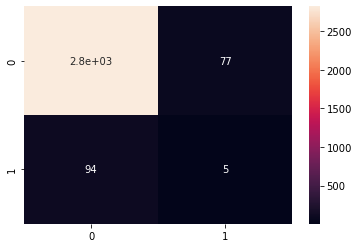

In [60]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True)

# Matriz de confusión (Hidden Markov Model)


In [61]:
#Cramos la matriz de confusión
print(confusion_matrix(y_test, y_pred_HMM))

[[1289    0 1612]
 [  55    0   44]
 [   0    0    0]]


<AxesSubplot:>

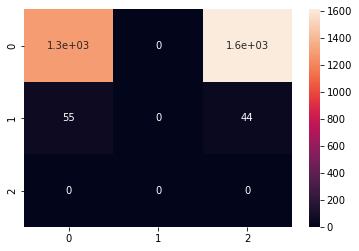

In [62]:
# Presentamos de forma estetica la matriz de confución
sns.heatmap(confusion_matrix(y_test, y_pred_HMM), annot=True)

# Matriz de Confusión Fuzzy Logic

In [56]:
acc_score_fuzzy = accuracy_score(y, y_pred_fuzzy)
#Imprimo el accuracy
print(acc_score_fuzzy)

0.4219


In [57]:
#Obtengo matriz de confusion 
cm_fuzzy = confusion_matrix(y, y_pred_fuzzy)
print(cm_fuzzy)

[[  70   15   24    3    0    0]
 [4236 4111 1265   40    0    0]
 [   2   39   37    0    0    0]
 [  43   41   10    1    0    0]
 [   5    7    6    0    0    0]
 [   2   25   18    0    0    0]]


<AxesSubplot:>

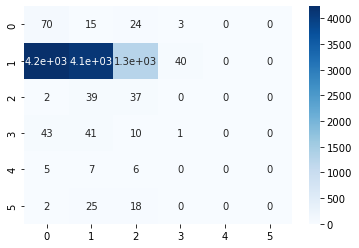

In [58]:
#Imprimir la matriz de confusión
sns.heatmap(confusion_matrix(y, y_pred_fuzzy), annot=True,cmap="Blues")

In [64]:
 #Mostrar el dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [67]:
#Importamos la libreria para el control de fuzzy logic
from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [66]:
#Instalar la libreria para la logica difusa
!pip install -U scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=9fbff316fb211d162196145750eb8813a7548a7a1cc602cd3c1c100c3696e4e8
  Stored in directory: c:\users\enrik\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [68]:
#Asignación de un rango de valores 
Toolwear = ctrl.Antecedent(np.arange(0, 253, 1), 'Tool wear')
Target = ctrl.Consequent(np.arange(0, 1, 1), 'Target')

In [75]:
#Asignación de rangos para el arreglo de antecedentes
Toolwear.automf(3)
Target['risk_low'] = fuzz.trimf(Target.universe, [0, 0, 1])

C:\Users\enrik\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


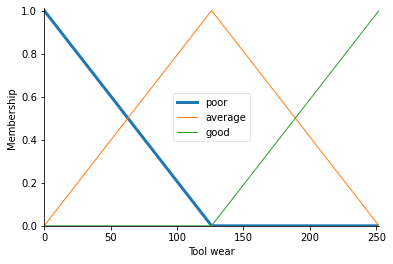

In [77]:
#Muestra el gráfico
Toolwear['poor'].view()